In [102]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import time

In [2]:
def PostF(y,X,b,sig0,mub,sigp):
    m = len(b)
    E = (np.linalg.norm(y - X.dot(b))**2)/(2*sig0*sig0) + (np.linalg.norm(b-mub)**2)/(2*sigp*sigp)
    E = E + 0.5*m*np.log(2*np.pi*sigp*sigp);
    return E

10
10
[0.0000e+00 0.0000e+00 9.0000e-05 1.0000e-05 6.0000e-05 4.0000e-05
 1.0000e-05 5.0000e-05 5.0000e-04 9.9924e-01]


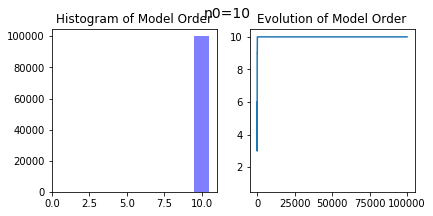

In [57]:
for n0 in range(10,11):
    m = 10
    print(n0)
    k = 10
    sig0 = 0.2
    sigp = 0.3
    sigr = 0.2
    mub = 2
    bT = mub + sigp*np.random.randn(n0)
    X = 5*np.random.randn(k,m)
    y = X[:,:n0].dot(bT) + sig0*np.random.randn(k)
    nc = int(np.ceil(np.random.rand()*m))
    bc = mub + sigp*np.random.randn(nc)
    b0 = bc

    norm_dist = scipy.stats.norm(0,sigr)
    errors = []

    N = 100000
    model = np.zeros(N)
    for it in range(N):
        n_p = int(np.ceil(np.random.rand()*m))
        model[it] = nc
        if n_p >= nc:
            U = sigr*np.random.randn(n_p)
            bp = np.concatenate((bc, np.zeros(n_p-nc)), axis=0) + U  
            hterm1 = np.prod(norm_dist.pdf(U))
            hterm2 = np.prod(norm_dist.pdf(U[:nc]))
        else:
            U1 = sigr*np.random.randn(n_p)
            U2 = bc[n_p+1:nc]
            bp = bc[:n_p] + U1
            U = np.concatenate((U1, U2), axis=0)
            hterm1 = np.prod(norm_dist.pdf(U))
            hterm2 = np.prod(norm_dist.pdf(U1))

        E1 = PostF(y,X[:,:n_p],bp,sig0,mub,sigp)
        E2 = PostF(y,X[:,:nc],bc,sig0,mub,sigp)
        rat  = np.exp(-E1+E2)*hterm2/hterm1
        uu = np.random.rand()
        if uu < np.min([1,rat]):
            bc = bp
            nc = n_p
        errors.append(np.linalg.norm(np.concatenate((bT,np.zeros(10-n0)), axis = 0)-np.concatenate((bc,np.zeros(10-nc)), axis = 0)))
    print(nc)
    
    plt.figure(figsize=(6.5,3))
    fig = plt.gcf()
    fig.suptitle('n0={}'.format(n0), fontsize=14)
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=-0.1, wspace=None, hspace=None)
    plt.subplot(1,2,1)
    plt.title('Histogram of Model Order')
    n, bins, patches = plt.hist(model, 10, facecolor='blue', alpha=0.5, range=(0.5,10.5))
    print(n/N)
    plt.subplot(1,2,2)
    plt.plot(model)
    plt.title('Evolution of Model Order')
    plt.ylim(0.5,10.5)
    plt.show()


In [104]:
m = 10
n0 = 4 # int(np.ceil(np.random.rand()*m))
print(n0)
k = 10
sig0 = 0.2
sigp = 0.3
sigr = 0.2

mub = 2
bT = mub + sigp*np.random.randn(n0)
print(bT)
X = 5*np.random.randn(k,m)
# X[:,5] = X[:,2] + 0.1*np.random.rand(k)
y = X[:,:n0].dot(bT) + sig0*np.random.randn(k)


4
[2.55766914 1.9613874  2.46794443 1.6665544 ]


....................................................................................................42.04802465438843
4 4
[2.61863758 1.91930994 2.43794011 1.64585699]


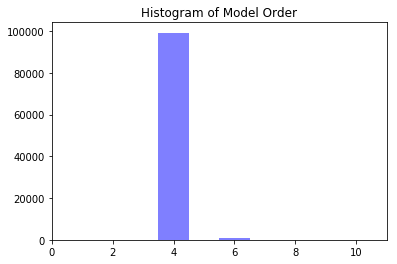

[0.0000e+00 0.0000e+00 1.0000e-05 9.9222e-01 1.0000e-04 6.4000e-03
 3.9000e-04 8.0000e-05 5.6000e-04 2.4000e-04]


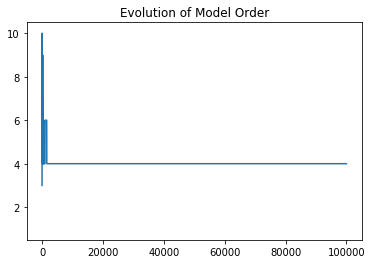

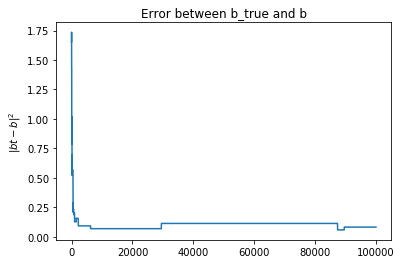

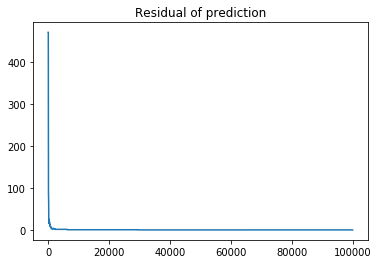

In [105]:
nc = int(np.ceil(np.random.rand()*m))
bc = mub + sigp*np.random.randn(nc)
b0 = bc

norm_dist = scipy.stats.norm(0,sigr)
errors = []
Rs = []
N = 100000
t1 = time.time()
model = np.zeros(N)
for it in range(N):
    if it % 1000 == 0:
        print('.',end='')
    n_p = int(np.ceil(np.random.rand()*m))
    model[it] = nc
    if n_p >= nc:
        U = sigr*np.random.randn(n_p)
        bp = np.concatenate((bc, np.zeros(n_p-nc)), axis=0) + U  
        hterm1 = np.prod(norm_dist.pdf(U))
        hterm2 = np.prod(norm_dist.pdf(U[:nc]))
    else:
        U1 = sigr*np.random.randn(n_p)
        U2 = bc[n_p+1:nc]
        bp = bc[:n_p] + U1
        U = np.concatenate((U1, U2), axis=0)
        hterm1 = np.prod(norm_dist.pdf(U))
        hterm2 = np.prod(norm_dist.pdf(U1))

    E1 = PostF(y,X[:,:n_p],bp,sig0,mub,sigp)
    E2 = PostF(y,X[:,:nc],bc,sig0,mub,sigp)
    rat  = np.exp(-E1+E2)*hterm2/hterm1
    uu = np.random.rand()
    if uu < np.min([1,rat]):
        bc = bp
        nc = n_p
    R = np.sum((y-X[:,:len(bc)].dot(bc))**2)
    Rs.append(R)
    errors.append(np.linalg.norm(np.concatenate((bT,np.zeros(10-n0)), axis = 0)-np.concatenate((bc,np.zeros(10-nc)), axis = 0)))
print(time.time()-t1)
print(len(bc), nc)
print(bc)

num_bins = 10
plt.title('Histogram of Model Order')
n, bins, patches = plt.hist(model, num_bins, facecolor='blue', alpha=0.5, range=(0.5,10.5))
plt.show()
print(n/N)
plt.plot(model)
plt.title('Evolution of Model Order')
plt.ylim(0.5,10.5)
plt.show()

plt.title('Error between b_true and b')
plt.ylabel('$|bt-b|^2$')
plt.plot(errors)
plt.show()

plt.title('Residual of prediction')
plt.plot(Rs)
plt.show()

In [65]:
errors[-4:]

[0.04050280511716853,
 0.04050280511716853,
 0.04050280511716853,
 0.04050280511716853]

In [66]:
Rs[-4:]

[0.34198812815288226,
 0.34198812815288226,
 0.34198812815288226,
 0.34198812815288226]

In [67]:
n = int(nc)-1
A = np.zeros((n,n))
B = np.zeros(n)
for i in range(n):
    for j in range(n):
        A[i,j] = X[:,i].dot(X[:,j])
    B[i] = y.dot(X[:,i])
b_ls = np.linalg.solve(A, B)
b_ls

array([1.5380507 , 2.69473882, 1.93637278])

In [68]:
R_ls = np.sum((y-X[:,:n].dot(b_ls))**2)
R_ls

217.5412113520997

In [80]:
n = int(nc)
A = np.zeros((n,n))
B = np.zeros(n)
for i in range(n):
    for j in range(n):
        A[i,j] = X[:,i].dot(X[:,j])
    B[i] = y.dot(X[:,i])
b_ls = np.linalg.solve(A, B)
b_ls

array([2.09356795, 1.9036839 ])

In [81]:
R_ls = np.sum((y-X[:,:n].dot(b_ls))**2)
R_ls

0.17120251781529394

In [71]:
n = int(nc)+1
A = np.zeros((n,n))
B = np.zeros(n)
for i in range(n):
    for j in range(n):
        A[i,j] = X[:,i].dot(X[:,j])
    B[i] = y.dot(X[:,i])
b_ls = np.linalg.solve(A, B)
b_ls

array([2.26841151, 2.29573783, 1.79479387, 1.59718134, 0.00451598])

In [72]:
R_ls = np.sum((y-X[:,:n].dot(b_ls))**2)
R_ls

0.1019403721494842

In [73]:
R = np.sum((y-X[:,:len(bc)].dot(bc))**2)
R

0.34198812815288226

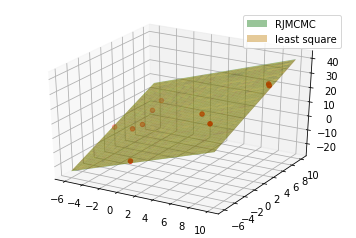

In [101]:
from mpl_toolkits.mplot3d import Axes3D

xx1 = np.linspace(-6,10,100)
xx2 = np.linspace(-6,10,100)
X1, X2 = np.meshgrid(xx1,xx2)
yy = b_ls[0]*X1 + b_ls[1]*X2

yy2 = bc[0]*X1 + bc[1]*X2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X1, X2, yy2, alpha = 0.4, label = 'RJMCMC',color = 'green')
surf2 = ax.plot_surface(X1, X2, yy, alpha = 0.4, label = 'least square',color = 'orange')
surf1._facecolors2d=surf1._facecolors3d
surf1._edgecolors2d=surf1._edgecolors3d
surf2._facecolors2d=surf2._facecolors3d
surf2._edgecolors2d=surf2._edgecolors3d
ax.scatter(X[:,0],X[:,1],y,c='r')
ax.legend()
plt.show()

In [160]:
m = 10
# n0 =int(np.random.rand()*m)
k = 50
sig0 = 0.2
sigp = 1.5
sigr = 0.2

mub = 0.
bT = mub + sigp*np.random.rand(m)
print(bT)
X = 5*np.random.rand(k,m)
y = X.dot(bT) + sig0*np.random.rand(k)

[0.4444722  1.03547651 0.35780618 1.45288631 0.32169047 0.79815682
 1.10370814 0.32402922 1.35800916 1.16930682]


....................................................................................................7
[1.19574361 1.05628444 2.57297924 1.13591998 0.80066299 0.97745224
 0.97001587]


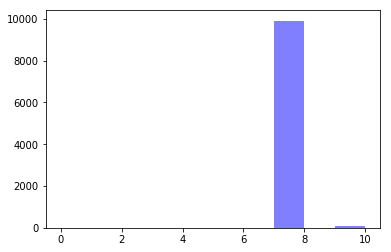

[0.00e+00 0.00e+00 0.00e+00 1.00e-04 0.00e+00 0.00e+00 2.00e-04 9.91e-01
 1.00e-04 8.60e-03]


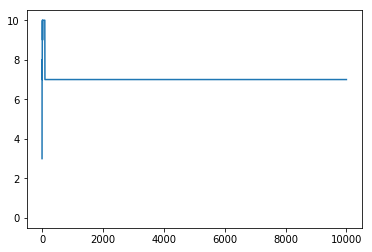

In [161]:
nc = int(np.ceil(np.random.rand()*m))
bc = mub + sigp*np.random.rand(nc)
b0 = bc

N = 10000
model = np.zeros(N)
for it in range(N):
    if it % 100 == 0:
        print('.',end='')
    n_p = int(np.ceil(np.random.rand()*m))
    model[it] = nc
    if n_p >= nc:
        U = sigr*np.random.rand(n_p)
        bp = np.concatenate((bc, np.zeros(n_p-nc)), axis=0) + U  
        hterm1 = np.prod(scipy.stats.norm(0,sigr).pdf(U))
        hterm2 = np.prod(scipy.stats.norm(0,sigr).pdf(U[:nc]))
    else:
        U1 = sigr*np.random.rand(n_p)
        U2 = bc[n_p:nc]
        bp = bc[:n_p] + U1
        U = np.concatenate((U1, U2), axis=0)
        hterm1 = np.prod(scipy.stats.norm(0,sigr).pdf(U))
        hterm2 = np.prod(scipy.stats.norm(0,sigr).pdf(U1))

    E1 = PostF(y,X[:,:n_p],bp,sig0,mub,sigp)
    E2 = PostF(y,X[:,:nc],bc,sig0,mub,sigp)
    rat  = np.exp(-E1+E2)*hterm2/hterm1
    uu = np.random.rand()
    if uu < np.min([1,rat]):
        bc = bp
        nc = n_p
print(len(bc))
print(bc)

num_bins = 10
n, bins, patches = plt.hist(model, num_bins, facecolor='blue', alpha=0.5, range=(0,10))
plt.show()
print(n/N)
plt.plot(model)
plt.ylim(-0.5,10.5)
plt.show()

In [162]:
R = np.sum((y-X[:,:len(bc)].dot(bc))**2)
R

589.7241824527736

In [175]:
n = int(nc)
A = np.zeros((n,n))
B = np.zeros(n)
for i in range(n):
    for j in range(n):
        A[i,j] = X[:,i].dot(X[:,j])
    B[i] = y.dot(X[:,i])
b_ls = np.linalg.solve(A, B)
b_ls

array([1.13272665, 1.25120685, 1.28798705, 1.62989517, 0.45086562,
       1.16339899, 1.53908764])

In [176]:
R_ls = np.sum((y-X[:,:n].dot(b_ls))**2)
R_ls

331.4553895781812